# README File


## Overview

### Main Goal

The main goal of this project is to identify the top-performing influencers on Insagram in the United States who create content in categories such as ***"lifestyle"***, ***"fashion"*** and ***"modeling"***. The purpose is to effectively target audiences in these areas with high-end product line of our client's and ensure successful marketing campaigns.

#### - *Solution:*

To achieve this, I will create an interactive dashboard in Power BI. The dashboard will provide detailed insights into top ***U.S influencers***, focusing on:

- Number of followers,
- Average authentic engagement
- Engagement rate.

This will help the marketing team make informed decisions by identifying the most suitable influencers to collaborate with for their marketing campaigns.

#### - *User Perspective:*

- As a Marketing Manager, I want to use a dashboard that analyzes influencer performance in the United States.

- This dashboard should allow me to identify the top-performing instagrammers based on metrics like ***followers*** and ***average engagement***.   

- With this information, I can make more informed decisions about which Influencers are right to collaborate with, and therefore maximize how effective each marketing campaign is.


## Data Source:

The dataset I used for this project has name **"top 1000 instagrammers"** and is from [kaggle website](https://www.kaggle.com/datasets/syedjaferk/top-1000-instagrammers-world-cleaned).


## Questions to be answered by using the dashboard

1. Who are the top 10 Instagram influencers with the highest number of followers?

2. Which 3 influencers have the highest average engagement?

3. Which 3 influencers have the highest engagement rates?


## Tools I Used

- Excel: Exploring and cleaning data 
- PostgreSQL: Cleaning, testing and analyzing the data
- Power BI: Visualizing the data by interacitve dashboard
- Jupyter Notebook: Create project interactive document

## Data Preparation and Cleanup in Excel


##### Our Data Sample after transform from "csv.file"

We can notice that the values ​​of million and thousands in columns like "Followers", "Authentic Engagement", "Engagement Avg." are replaced with the letters "M" and "K". So in next step I will add helper columns.

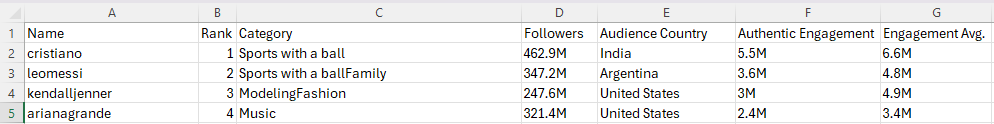

##### Add helper columns with use formulas:

Replace "." with ",":


```Excel
=SUBSTITUTE(D2; "."; ",")

=SUBSTITUTE(F2; "."; ",")

=SUBSTITUTE(G2; "."; ",")
```

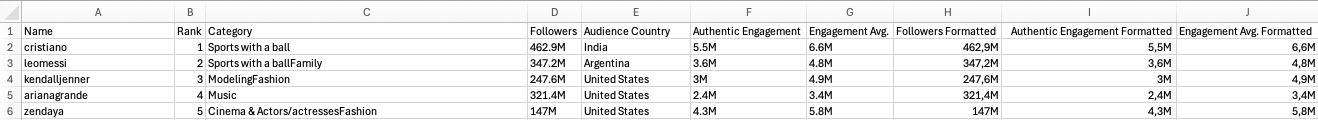

Transform "M" and "K" letters to "1000000" and "1000": 


```Excel
=IF(RIGHT(TRIM(H2);1)="M"; VALUE(SUBSTITUTE(LEFT(TRIM(H2);LEN(TRIM(H2))-1);".";","))*1000000; IF(RIGHT(TRIM(H2);1)="K"; VALUE(SUBSTITUTE(LEFT(TRIM(H2);LEN(TRIM(H2))-1);".";","))*1000; IF(ISNUMBER(H2); H2; "")))

=IF(RIGHT(TRIM(I2);1)="M"; VALUE(SUBSTITUTE(LEFT(TRIM(I2);LEN(TRIM(I2))-1);".";","))*1000000; IF(RIGHT(TRIM(I2);1)="K"; VALUE(SUBSTITUTE(LEFT(TRIM(I2);LEN(TRIM(I2))-1);".";","))*1000; IF(ISNUMBER(I2); I2; "")))

=IF(RIGHT(TRIM(J2);1)="M"; VALUE(SUBSTITUTE(LEFT(TRIM(J2);LEN(TRIM(J2))-1);".";","))*1000000; IF(RIGHT(TRIM(J2);1)="K"; VALUE(SUBSTITUTE(LEFT(TRIM(J2);LEN(TRIM(J2))-1);".";","))*1000; IF(ISNUMBER(J2); J2; "")))
```

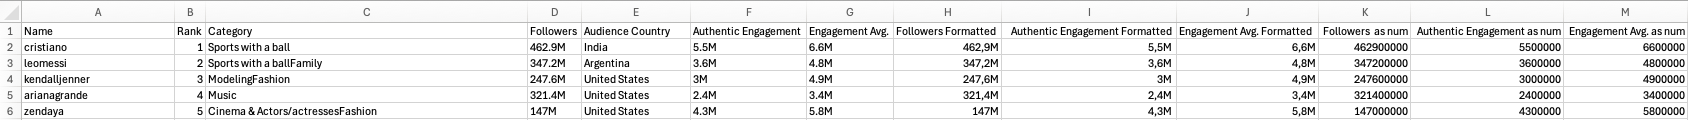

##### Drop unnecessary columns
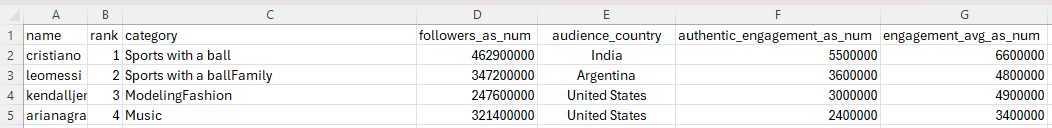

## Data Preparation, Testing, Cleanup and Filter in SQL

##### Create schema and table in SQL server then load our Data from "csv_file" to the table.

```PostgreSQL
-- Creating Schema:

create schema project_sql_excel_power_bi;

-- Creating Table:

create table project_sql_excel_power_bi.top_1000_influencers (
    name VARCHAR(50),
    rank INT,
    category VARCHAR(255),
    audience_country VARCHAR(50),
    followers_as_num INT,
    authentic_engagement_as_num NUMERIC,
    engagement_avg_as_num NUMERIC
);
```

##### Import Data of "top_1000_influencers" from my "csv_file" to the table.


##### Create the SQL view

```PostgreSQL
-- Creating view:

create view project_sql_excel_power_bi.view_influ_data as (
select
    name as influencer_name,
    rank,
    category,
    audience_country,
    followers_as_num as followers,
    authentic_engagement_as_num as avg_authentic_engagement,
    engagement_avg_as_num as avg_engagement
from 
	project_sql_excel_power_bi.top_1000_influencers
);
```

##### Check the total number of rows

```PostgreSQL
-- Count the total number of records (or rows) are in the SQL view:

select
    COUNT(*) AS no_of_rows
from
    view_influ_data;
```

Result

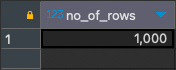

##### Total columns number

```PostgreSQL
-- Count the total number of columns are in the SQL view

select
    count(*) as column_count
from
    information_schema.columns
where
    table_name = 'view_influ_data'
    and table_schema = 'project_sql_excel_power_bi';
```

Result

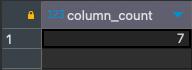

##### Check the data types

```PostgreSQl
-- Check the data types of each column from the view by checking the INFORMATION SCHEMA view

select
    COLUMN_NAME,
    DATA_TYPE
from
    INFORMATION_SCHEMA.columns
where
    TABLE_NAME = 'view_influ_data';
```

Result

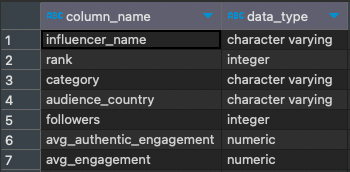

##### Check for missing data

- Check the number of empty values

```PostgreSQL
select COUNT(*) AS empty_values_count
from view_influ_data
where category = '';
```
- Check the number of values equal to 0

```PostgreSQL
select COUNT(*) AS zero_count
from view_influ_data
where avg_authentic_engagement = 0;
```

Result

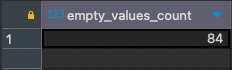
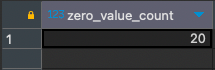

##### Check if we have duplicates rows

```PostgreSQL
select
    COUNT(*) - COUNT(distinct influencer_name) as total_duplicates
from 
    project_sql_excel_power_bi.view_influ_data;
```

Result

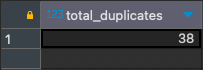

##### Drop duplicates and missing data  

- Create CTE and then now I want to delete the rows where the same name value appears again, but keep the first one.
- Also delete missing values like ' ' and records where value of avg_authentic_engagement is equal 0.
- First I would like to do it on a copy of our 'view_influ_data'.


```PostgreSQL
create table view_influ_data_copy as (
select
    * 
from 
    view_influ_data
);

```

-- Create Common Table Expression to give row numbers

-- Remove duplicates rows and missing data

```PostgreSQL
with no_duplicates_and_missing_values as (
    select 
        ctid,
        ROW_NUMBER() over (PARTITION by influencer_name ORDER by rank) as rn
    from 
        project_sql_excel_power_bi.view_influ_data_copy
)
delete from project_sql_excel_power_bi.view_influ_data_copy
where ctid in (
    select 
        ctid
    from 
        no_duplicates_and_missing_values
    where rn > 1
       or category = ''
       or avg_authentic_engagement = 0
);
```

##### Check how many rows we have now

```PostgreSQL
select 
    COUNT(*) AS no_of_rows
from
    view_influ_data_copy;
```

Result

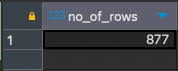

##### Filtering data

 - Retrieving data on influencers with the most influence in the United States,
 - Filtered by the categories such as "Lifestyle", "Fashion" and "Modeling".
 - Results are ordered by authentic engagement in descending order to highlight the most engaging influencers.


```PostgreSQL
create view filtered_top_50_influ_by_country_and_categories as (
select
    influencer_name,
    category,
    avg_authentic_engagement,
    followers
from
    view_influ_data_copy
where
    audience_country = 'United States'
    and (category like '%Lifestyle%' or category like '%Fashion%' or category like '%Modeling%')
order by 
    avg_authentic_engagement desc
limit 50);
```

## Visualization data in Power BI

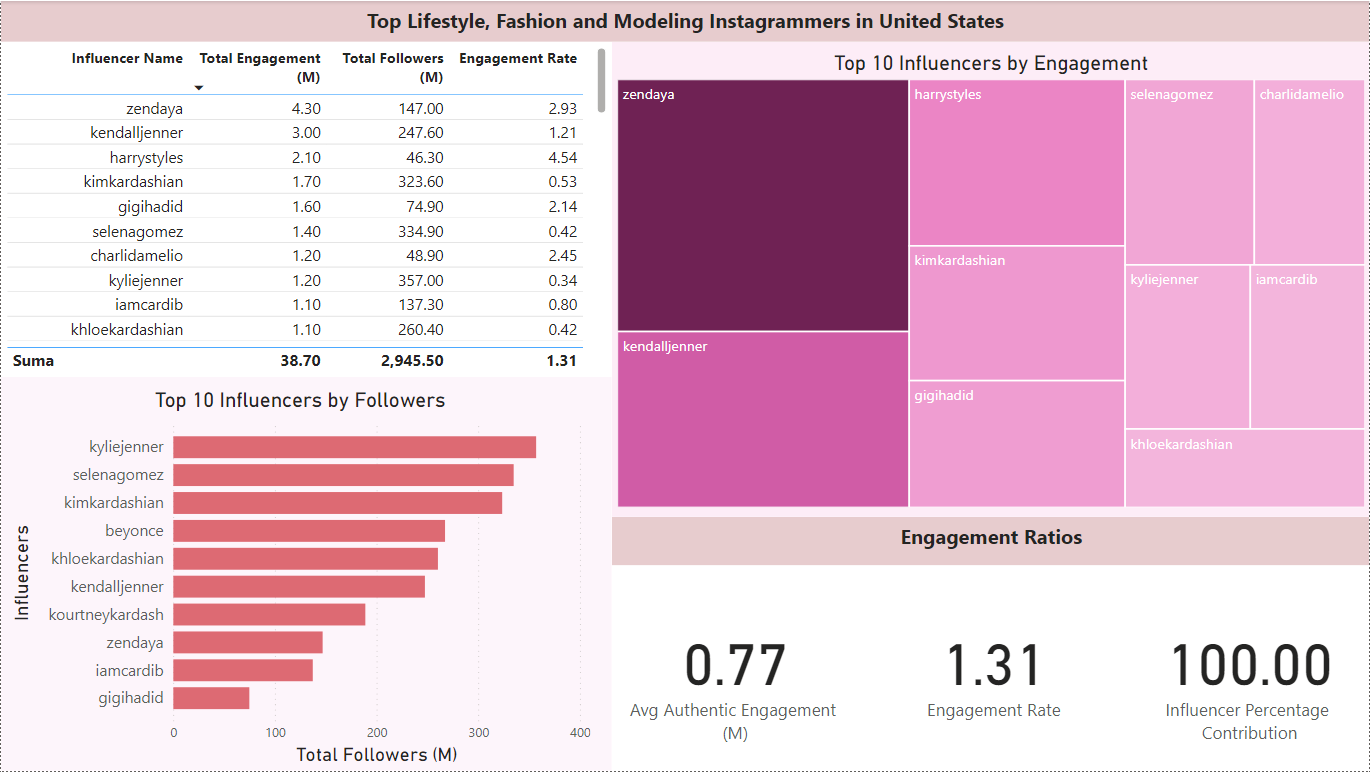

### DAX Measures:

Total Engagement (M)

```DAX
Total Engagement (M) = DIVIDE(SUM(top_50_influencers[avg_authentic_engagement]), 1000000)

````

Total Followers (M)

```DAX
Total Followers (M) = DIVIDE(SUM(top_50_influencers[followers]), 1000000)

```

Avg Authentic Engagement (M)

```DAX
Avg Authentic Engagement (M) = 
VAR AvgEngagement = AVERAGE(top_50_influencers[avg_authentic_engagement])

RETURN DIVIDE(AvgEngagement, 1000000, BLANK())

```

Engagement Rate

```DAX
Engagement Rate = 
VAR TotalEngagement = SUM(top_50_influencers[avg_authentic_engagement])
VAR TotalFollowers = SUM(top_50_influencers[followers])

RETURN DIVIDE(TotalEngagement, TotalFollowers, 0) * 100

```

Influencer Percentage Contribution

```DAX
Influencer Percentage Contribution = 
VAR TotalEngagement = CALCULATE(SUM(top_50_influencers[avg_authentic_engagement]), ALL(top_50_influencers))
VAR IndividualEngagement = SUM(top_50_influencers[avg_authentic_engagement])

RETURN DIVIDE(IndividualEngagement, TotalEngagement, 0) * 100

```

## Analysis

#### 1. Who are the top Influencers with the most followers?

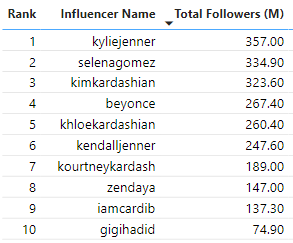

#### 2. Which 3 influencers have the highest average engagement?

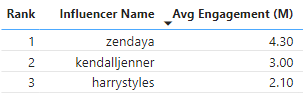

#### 3. Which 3 influencers have the highest engagement rates?

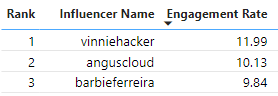

### Now we will focus analysing these above metrics that are important in generating the expected ***ROI*** (Return on Investment).

### 1. Influencers with the most followers. 

#### Calculation breakdown:

Campaign idea = ***product placement***

Conversion Rate = 0.02

Product Cost = $300

Campaign Cost (one-time fee) = $75,000 

##### 1. **kyliejenner**

AVG Engagement per Post = 1,200,000

Potential Product Sales per Interaction = AVG Engagement per Post x Conversion Rate -> 1,200,000 x 0.02 = 24,000

Potential Revenue per Post = Potential Product Sales x Product Cost -> 24,000 x $300 = $7,200,000

Net Profit = Potential Revenue per Post - Campaign Cost = $7,200,000 - $75,000 = $7,125,000

##### 2. **selenagomez**

AVG Engagement per Post = 1,400,000

Potential Product Sales per Interaction = AVG Engagement per Post x Conversion Rate -> 1,400,000 x 0.02 = 28,000

Potential Revenue per Post = Potential Product Sales x Product Cost -> 28,000 x 300 = $8,400,000 

Net Profit = Potential Revenue per Post - Campaign Cost = 8,400,000 - 75,000 = 8,325,000

##### 3. **kimkardashian**

AVG Engagement per Post = 1,700,000

Potential Product Sales per Interaction = AVG Engagement per Post x Conversion Rate -> 1,700,000 x 0.02 = 34,000

Potential Revenue per Post = Potential Product Sales x Product Cost -> 34,000 x $300 = $10,200,000 

Net Profit = Potential Revenue per Post - Campaign Cost = $10,200,000 - $75,000 = $10,125,000

#### Excel breakdown:

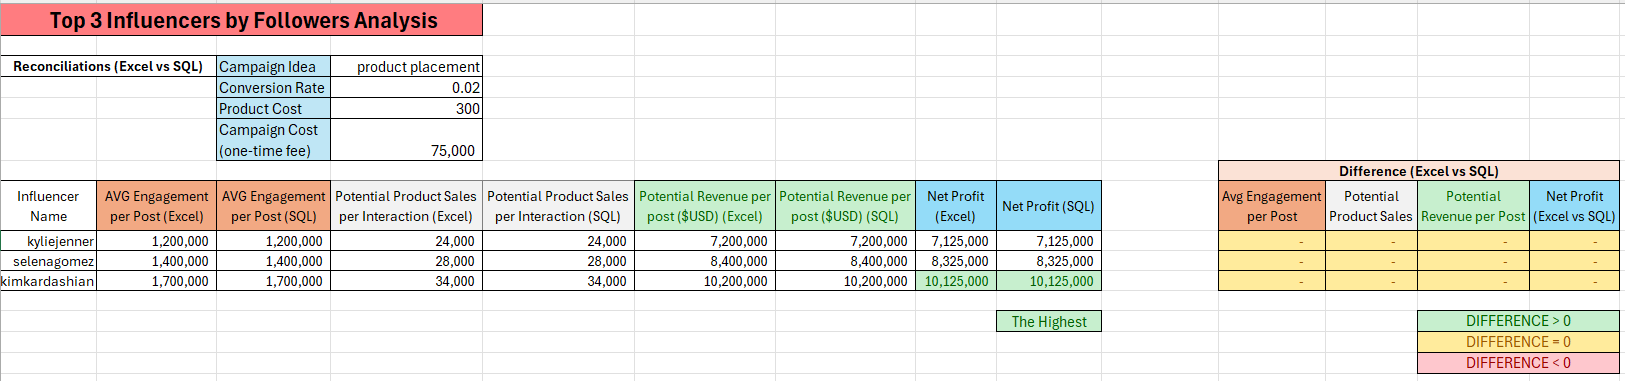

#### SQL code:

```Posgresql
-- Top 3 by Followers Analysis

    -- Campaign Idea = Product Placement
	-- The conversion rate = 0.02
	-- The product cost = $300
	-- The campaign cost (one-time fee) = $75,000

WITH top_influ_by_followers AS (
    SELECT
        influencer_name,
        avg_authentic_engagement as AVG_Engagement_per_Post,
        Followers
    FROM
        project_SQL_EXCEL_POWER_BI.filtered_top_50_influ_by_country_and_categories
)
select
	influencer_name,
	avg_authentic_engagement,
	(avg_authentic_engagement * 0.02) as Potential_Units_per_Interactions,
	(avg_authentic_engagement * 0.02 * 300) as Potential_Revenue_per_Post,
	(avg_authentic_engagement * 0.02 * 300 - 75000) as Net_Profit
from
	project_sql_excel_power_bi.view_influ_data_copy
where 
	Influencer_Name in ('kyliejenner', 'selenagomez', 'kimkardashian')
order by
	Net_Profit desc;
```

##### Result:

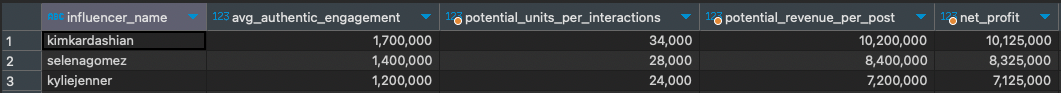

#### - Best option from category: **Kim Kardashian**

### 2. Influencers with highest average engagement.

#### Calculation breakdown:

Campaign idea = ***influencer marketing***

Conversion Rate = 0.02

Product Cost = $300

Campaign Cost (3-month contract) = $140,000 

##### 1. **zendaya**

AVG Engagement per Post = 4,300,000

Potential Product Sales per Interaction = AVG Engagement per Post x Conversion Rate -> 4,300,000 x 0.02 = 86,000

Potential Revenue per Post = Potential Product Sales x Product Cost -> 86,000 x $300 = $25,800,000

Net Profit = Potential Revenue per Post - Campaign Cost = $25,800,000 - $140,000 = 25,660,000

##### 2. **kendalljenner**

AVG Engagement per Post = 3,000,000

Potential Product Sales per Interaction = AVG Engagement per Post x Conversion Rate -> 3,000,000 x 0.02 = 60,000

Potential Revenue per Post = Potential Product Sales x Product Cost -> 60,000 x $300 = $18,000,000 

Net Profit = Potential Revenue per Post - Campaign Cost = $18,000,000 - $140,000 = $17,860,000

##### 3. **harrystyles**

AVG Engagement per Post = 2,100,000

Potential Product Sales per Interaction = AVG Engagement per Post x Conversion Rate -> 2,100,000 x 0.02 = 42,000

Potential Revenue per Post = Potential Product Sales x Product Cost -> 42,000 x $300 = $12,600,000 

Net Profit = Potential Revenue per Post - Campaign Cost = $12,600,000 - $140,000 = $12,460,000

#### Excel breakdown:

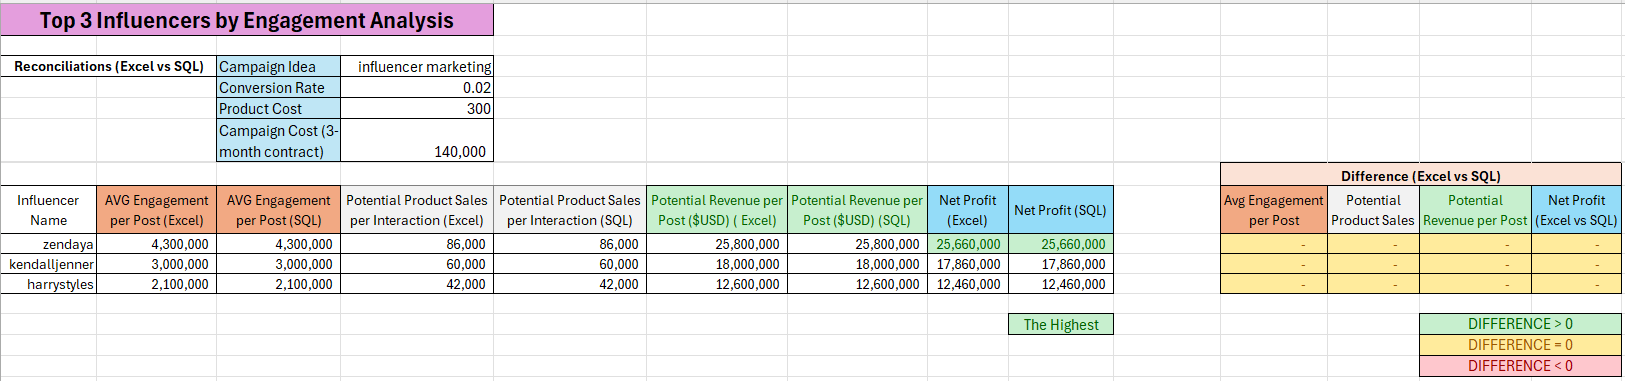

#### SQL code:

```Posgresql
-- Top 3 by Engagement Analysis
 
    -- Campaign Idea = Influencer Marketing
    -- The conversion rate = 0.02
    -- The product cost = $300
    -- The campaign cost (3-month contract) = $140,000 

WITH top_influ_by_engagement AS (
    SELECT
        influencer_name,
        avg_authentic_engagement as AVG_Engagement_per_Post,
        Followers
    FROM
        project_SQL_EXCEL_POWER_BI.filtered_top_50_influ_by_country_and_categories
)
select
	influencer_name,
	avg_authentic_engagement,
	(avg_authentic_engagement * 0.02) as Potential_Units_per_Interactions,
	(avg_authentic_engagement * 0.02 * 300) as Potential_Revenue_per_Post,
	(avg_authentic_engagement * 0.02 * 300 - 140000) as Net_Profit
from
	project_sql_excel_power_bi.view_influ_data_copy
where 
	Influencer_Name in ('zendaya', 'kendalljenner', 'harrystyles')
order by
	Net_Profit desc;
```

##### Result:

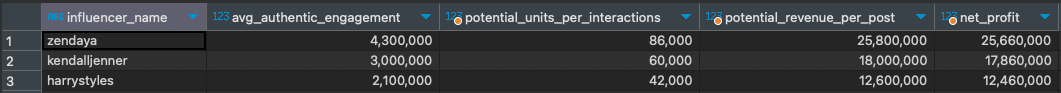

#### - Best option from category: **Zendaya**

### 3. Influencers with highest engagament rate. 

#### Calculation breakdown:

Campaign idea = ***Sponsored Post Series***

Conversion Rate = 0.02

Product Cost = $300

Campaign Cost (per post) = $7,500

Number of Posts = 11

##### 1. **vinniehacker**

AVG Engagement per Post = 695,700

Potential Product Sales per Interaction = AVG Engagement per Post x Conversion Rate -> 695,700 x 0.02 = 13,914

Potential Revenue per Post = Potential Product Sales x Product Cost -> 13,914 x $300 = $4,174,200

Net Profit = Potential Revenue per Post - Campaign Cost ->  $4,174,200 - $7,500 = $4,166,700

Total Net Profit = Net Profit x Number of Posts -> $4,166,700 x 11 = $45,833,700

##### 2. **anguscloud**

AVG Engagement per Post = 831,000 

Potential Product Sales per Interaction = AVG Engagement per Post x Conversion Rate -> 831,000 x 0.02 = 16,620

Potential Revenue per Post = Potential Product Sales x Product Cost -> 16,620 x $300 = $4,986,000

Net Profit = Potential Revenue per Post - Campaign Cost -> $4,986,000 - $7,500 = $4,978,500 

Total Net Profit = Net Profit x Number of Posts -> $4,978,500 x 11 = $54,763,500

##### 3. **barbieferreira**

AVG Engagement per Post = 620,000

Potential Product Sales per Interaction = AVG Engagement per Post x Conversion Rate ->  620,000 x 0.02 = 12,400

Potential Revenue per Post = Potential Product Sales x Product Cost -> 12,400 x $300 = $3,720,000

Net Profit = Potential Revenue per Post - Campaign Cost x Post -> $3,720,000 - $7,500 =  $3,712,500

Total Net Profit = Net Profit x Number of Posts -> $3,712,500 x 11 = $40,837,500

#### Excel breakdown:

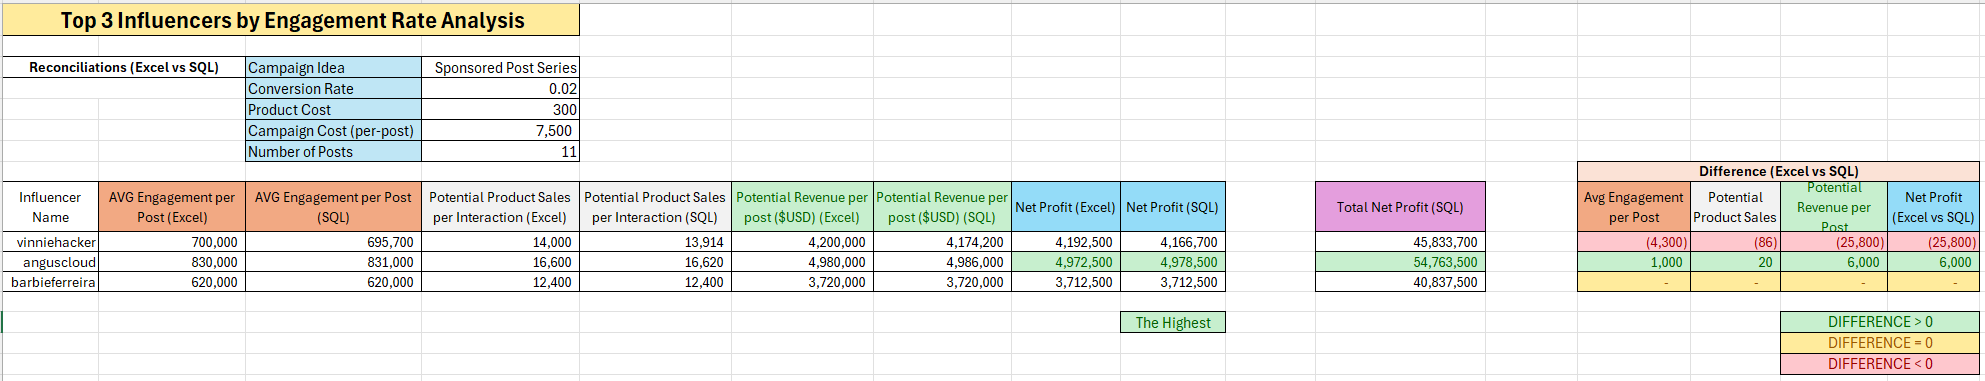

#### SQL code:

```Posgresql
-- Top 3 by Engagement Rate Analysis

   -- Campaign Idea = Sponsored Post Series
   -- The conversion rate = 0.02
   -- The product cost = $300
   -- The campaign cost (per-post) = $7,500
   -- The nomber of posts = 11

with top_influ_by_engagement_rate as (
	SELECT
        influencer_name,
        avg_authentic_engagement as AVG_Engagement_per_Post,
        followers
    FROM
        project_SQL_EXCEL_POWER_BI.filtered_top_50_influ_by_country_and_categories
)
select
	influencer_name,
	avg_authentic_engagement,
	(avg_authentic_engagement * 0.02) as Potential_Units_per_Interactions,
	(avg_authentic_engagement * 0.02 * 300) as Potential_Revenue_per_Post,
	(avg_authentic_engagement * 0.02 * 300 - 7500) as Net_Profit
    ((avg_authentic_engagement * 0.02 * 300 - 7500) x 11) as Total_Net_Profit
from
	project_sql_excel_power_bi.view_influ_data_copy
where 
	Influencer_Name in ('vinniehacker', 'anguscloud', 'barbieferreira')
order by
	Total_Net_Profit desc;
```

##### Result:

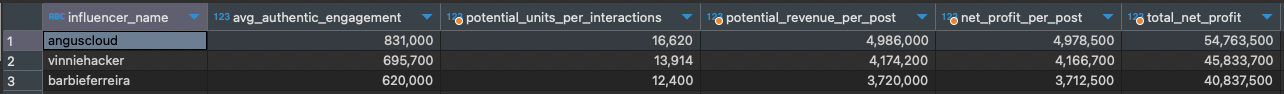

### Insights:

- **Kylie Jenner**, **Selena Gomez**, and **Kim Kardashian** dominate in terms of follower count, which in cooperation may have an impact on visibility.

- **Zendaya**, **Kendall Jenner**, and **Harry Styles** lead in authentic engagement, making them strong candidates for campaigns focused on interaction rather than pure visibility.

- **Angus Cloud**, **Vinnie Hacker**, **Barbie Ferreira** have the highest engagement rate, which may indicate about regular posting and frequent interactions with followers.

- While there is a moderate correlation between followers and engagement, it is clear that having more followers does not always translate to higher engagement. Strategic selection of influencers based on campaign goals is crucial.

### Challenges I faced:

- Used helper columns to change inconsistent data formats. For example, numbers written as text with "K" for thousands and "M" for millions were converted to numeric format.

- Found and removed duplicate records. Created queries to show which rows are duplicates and how many there are. Then, created a view of the table after removing unnecessary rows.

- Chose metrics and visualizations. Decided which metrics best reflect the performance of influencers and how to present them.

- Selected a campaign strategy for influencers. Matched the campaign strategy to each influencer based on their reach and engagement level.

### Recommendations:

- **Zendaya** and **Kendal Jenner** are the best instagrammers for long-term collaboration if we aim to maximize reach and profit because this profiles have the highest average engagement per post.

- While **Kim Kardashian** and **Selena Gomez** have the largest number of followers in the United States, which could help boost visibility. We need to notice that collaboration in long-term is not profitable as in the case of **Zendaya** and **Kendal Jenner**.

- A profile like **Angus Cloud** has the highest engagement to followers ratio. Kind of that influencer work with based on series posts could lead to higher profits with lower campaign costs.

- The top channels for potential cooperation are **Zendaya** and **Kendall Jenner** for their generating engagement and profit. **Angus Cloud** for lower costs and higher returns. We may also include **Kim Kardashian** to consider a one-time product placement collaboration.

### Potential ROI (Return on investment):

##### What ROI do we expect if we take this course of action?

- An **influencer marketing** contract with **Zendaya** could generate a net profit of **$25,660,000 per post**.  

- A collaboration with **Kendall Jenner** could bring a net profit of **$17,860,000 per post**.  

- A **sponsored post series** campaign featuring **Angus Cloud** could deliver **$4,978,500 per post**
  and **$54,763,500** when we count total result from all scheduled eleven posts.  

- A **product placement** deal with **Kim Kardashian** could result in a net profit of **$10,125,000**, making it a good option to consider.

### Plan of action:

##### What course of action should we take and why?

The best influencer to advance a long-term partnership deal with to promote the client's products is the **Zendaya**.
If we assume that influencer will share the post at least 3 times while of 3 months contract.

We'll have conversations with the marketing client to forecast what they also expect from this collaboration.

Once we observe we're hitting the expected key stages, we'll advance with potential partnerships with **Kendal Jenner**, **Angus Cloud** and **Kim Kardashian** instagrammers in the future.

Reach out to the teams behind each of these profiles, starting with **Zendaya**.

Negotiate contracts within the budgets allocated to each marketing campaign.

Kick off the campaigns and track each of their performances against the KPIs (Key Performance Indicators).

Review how the campaigns have gone, gather insights and optimize based on feedback from converted customers and each profile's audiences.